# Currency Rate Analysis

> Money often costs too much. --Ralph Waldo Emerson

A very used expression in our life, and if utilized just right, also very useful. 

In this notebook, we query a REST API to get the latest currency rates for many currencies. Using dynamic API compared to loading static files allows for updated data to be processed.

[![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/aiola-lab/from-excel-to-pandas/blob/master/notebooks/08.02_Currency_analysis.ipynb)

We will start with removing code warnings to make it easier to read the notebook.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Loading data using API

First of all, let's get our data.

In order to do so, let's start with installing all the needed libraries and get the right imports.

In [2]:
%pip install forex-python --quiet

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

from forex_python.converter import CurrencyRates
from datetime import datetime

Let's get the data

In that case, the function here is given by the provider of this API, and for more methods, you can go to [forext-python usage page](https://forex-python.readthedocs.io/en/latest/usage.html)

In [4]:
usd_rates = (
    CurrencyRates()
    .get_rates('USD')
)
usd_rates

{'EUR': 0.8846426043878273,
 'JPY': 113.78273177636234,
 'BGN': 1.7301840056617126,
 'CZK': 21.698513800424625,
 'DKK': 6.584483368719037,
 'GBP': 0.741357041755131,
 'HUF': 318.32979476291575,
 'PLN': 4.031493276716207,
 'RON': 4.374823071479121,
 'SEK': 9.29210898796886,
 'CHF': 0.9118895966029723,
 'ISK': 128.80396319886765,
 'NOK': 8.991330502476998,
 'HRK': 6.660474168435951,
 'RUB': 78.4226822363765,
 'TRY': 13.413039631988676,
 'AUD': 1.4035739561217266,
 'BRL': 5.47602618542109,
 'CAD': 1.2622965322009907,
 'CNY': 6.328113941967445,
 'HKD': 7.785120311394197,
 'IDR': 14343.320948336872,
 'INR': 74.61916135881104,
 'KRW': 1196.3995046001414,
 'MXN': 20.573779193205944,
 'MYR': 4.18895966029724,
 'NZD': 1.4951344656758667,
 'PHP': 51.34907997169144,
 'SGD': 1.346072186836518,
 'THB': 33.06970983722576,
 'ZAR': 15.26088110403397}

Let's turn it into something more readable and easier to manipulate, by converting its type from Dictionary to DataFrame, and give its columns proper informative names.

In [5]:
usd_rates_df = (
    pd
    .DataFrame
    .from_dict(usd_rates, orient='index')
    .rename(columns={0 : 'Rate'})
)
usd_rates_df

,Rate
EUR,0.884643
JPY,113.782732
BGN,1.730184
CZK,21.698514
DKK,6.584483
GBP,0.741357
HUF,318.329795
PLN,4.031493
RON,4.374823
SEK,9.292109


This looks like a useful table to have if you work with multiple currencies in your organization

### Getting rates for a specific date

We will use the date functionality from the API provider.
* Call the currency API
* Request exchange rates
* for USD
* for 2020-05-23

In [6]:
usd_rate_on_date = (
   CurrencyRates()
    .get_rates(
        'USD',
        datetime(2020, 5, 23)
    )
)
usd_rate_on_date

{'EUR': 0.917094644167278,
 'USD': 1,
 'JPY': 107.53851797505503,
 'BGN': 1.7936537050623624,
 'CZK': 24.954145267791635,
 'DKK': 6.839508437270726,
 'GBP': 0.8213774761555392,
 'HUF': 320.43286867204694,
 'PLN': 4.146093176815848,
 'RON': 4.44194790902421,
 'SEK': 9.663701393983859,
 'CHF': 0.9712949376375641,
 'ISK': 143.34189288334557,
 'NOK': 10.003484959647835,
 'HRK': 6.95570432868672,
 'RUB': 71.45442039618489,
 'TRY': 6.807318415260455,
 'AUD': 1.530997798972854,
 'BRL': 5.581162876008804,
 'CAD': 1.400678650036684,
 'CNY': 7.134721203228173,
 'HKD': 7.7559611151870875,
 'IDR': 14901.999266324283,
 'ILS': 3.5270542920029344,
 'INR': 75.86803008070433,
 'KRW': 1241.2967718268526,
 'MXN': 22.96863536316948,
 'MYR': 4.362527512839325,
 'NZD': 1.6388481291269257,
 'PHP': 50.76027146001467,
 'SGD': 1.4234225972120322,
 'THB': 31.894717534849594,
 'ZAR': 17.6518708730741}

Now, try to use the functions showed prior in order to convert it into a dataframe.

In [7]:
# Enter your code here


And in case you wondered how to do so.

In [8]:
usd_rate_on_date = (
    pd
    .DataFrame
    .from_dict(usd_rate_on_date, orient='index')
    .rename(columns={0 : 'Rate'})
)
usd_rate_on_date

,Rate
EUR,0.917095
USD,1.000000
JPY,107.538518
BGN,1.793654
CZK,24.954145
DKK,6.839508
GBP,0.821377
HUF,320.432869
PLN,4.146093
RON,4.441948


### Putting it all together

* Create a Dataframe
* From dictionary
* Taken from the currency rate API
* for USD
* based on string date of 2020-05-23
* as a single column
* rename the column to Rate 

In [9]:
usd_rate_on_date = (
    pd
    .DataFrame
    .from_dict(
        CurrencyRates()
            .get_rates(
                'USD',
                datetime.strptime('2020-05-23', '%Y-%m-%d')
        ),
        orient='index')
    .rename(columns={0 : 'Rate'})
)
usd_rate_on_date


,Rate
EUR,0.917095
USD,1.000000
JPY,107.538518
BGN,1.793654
CZK,24.954145
DKK,6.839508
GBP,0.821377
HUF,320.432869
PLN,4.146093
RON,4.441948


## Deal conversion

Now, let's create a calculator that get's the amount of money we got/payed and in which currency

* Call the API
* For conversion rate
* from USD
* to EUR
* of $100
* on 2020-05-23 



In [10]:
( 
    CurrencyRates()
    .convert(
            'USD',
            'EUR',
             100,
            datetime.strptime('2020-05-23', '%Y-%m-%d')
        )
)

91.7094644167278

Now this data is useful while trying to calculate all sort of financial related data.

### Additional rates sources

And for cases when the wanted currency is not available through the API, there is always the option of scrapping it.

Here is example of scrapping ILS rate to USD from one of the popular financial websites in Israel.
* Create dataframes from HTML tables in the newspaper currency website
* Take the first table (index 0)
* Take the value in cell 1,1

In [11]:
(
    pd
    .read_html('https://www.globes.co.il/portal/instrument.aspx?instrumentid=10463')
    [0]
    .iloc[1,1]
)



'3.167'

In this example we have scrapped the currency rate from a non-API based website for our use.<br>
As for this example, this technique is relevent for many optional analysis.

## Analysis Use-case

Now, use case to show how useful descion based data regarding currency could be.

In order to show that, we will scrap a dataframe of the rates of the ILS-USD for the last almost full year.

* Read the table from the exchange-rate.org website
* Rename the column to be more meaningful
* Filter out table lines that are invalid (the Rate column has more than 20 characters)
* Remove all the characters from the _Rate_ column that are not a digit (\d) or dot (\.) using regular expression syntax
* convert it to a float type

In [12]:
df = (
    pd
    .read_html('https://www.exchange-rates.org/history/ILS/USD/T')
    [0]
    .rename(columns = {0 : 'Date', 1: 'Day', 2 : 'Rate', 3 : 'Notes'})
#     .query('Rate.str.len() < 20')
    .assign(Rate = lambda x : x.Rate.str.replace('[^\d\.]','',regex=True)
    .astype(float))
)
df

,Date,Day,Rate,Notes
0,1/21/2022,Friday,3.14075,USD ILS rate for 1/21/2022
1,1/20/2022,Thursday,3.13599,USD ILS rate for 1/20/2022
2,1/19/2022,Wednesday,3.13773,USD ILS rate for 1/19/2022
3,1/18/2022,Tuesday,3.13639,USD ILS rate for 1/18/2022
4,1/17/2022,Monday,3.10865,USD ILS rate for 1/17/2022
...,...,...,...,...
125,7/30/2021,Friday,3.22303,USD ILS rate for 7/30/2021
126,7/29/2021,Thursday,3.23996,USD ILS rate for 7/29/2021
127,7/28/2021,Wednesday,3.24354,USD ILS rate for 7/28/2021
128,7/27/2021,Tuesday,3.25632,USD ILS rate for 7/27/2021


Now let's check in which day of the week, does the rate of the ILS is "stronger", in accordance to the USD.<br>
This data could be useful in order to maximize the rate when doing currency conversions on a regular basis.

Now let's try to check for the days with the highest average rate of the ILS in comparing to the USD.

In order to do so, we will aggregate with Group-by, all of the values by the Day of the week, and check for the average (mean) value for each day.

Beside that, let's also orgnaize our data by some order, in order case descending.

In [13]:
(
    df
    .groupby(['Day'])
    ['Rate']
    .mean()
    .sort_values(ascending=False)
)

Day
Monday       3.176526
Tuesday      3.175030
Wednesday    3.174225
Friday       3.172393
Thursday     3.172075
Name: Rate, dtype: float64

And the result is? Well, Sunday.<br>

Our guess is that its related to the fact that Sunday is weekend in the US and therefore, trade volumes are lower.

This, we assess, reduces the affect of the general trend.

Another test, would be to do the same, but with the median value for each week day.

In [14]:
(
    df
    .groupby(['Day'])
    ['Rate']
    .median()
    .sort_values(ascending=False)
)

Day
Monday       3.200975
Tuesday      3.200585
Wednesday    3.195530
Friday       3.189345
Thursday     3.186640
Name: Rate, dtype: float64

### Analysis output

Bottom line, if you are converting ILS to USD, try doing it on Sunday. You will probably get the better rate. On the other hand, if you are trading USD to ILS, just don't do it on Sunday.

One more note, did you notice how we used and scrapped many types of websites, side by our API.

The reason? None of them was sufficient so we had to dig deeper. and thats OK.

So, one last tip from us to you, don't be afraid of looking for your data source.

## Data Visualization 

### Line Chart

Now, let's try to better see and and possibly explorate, the results we just recieved.

First, few actions needs to be done in prior.

In [15]:
import matplotlib.pyplot as plt

In [16]:
usd_to_ils_rates = (
    pd
    .read_html('https://www.exchange-rates.org/history/ILS/USD/T')
    [0]
    .rename(columns = {0 : 'Date', 1: 'Day', 2 : 'Rate', 3 : 'Notes'})
#     .query('Rate.str.len() < 20')
    .assign(Rate = lambda x : x.Rate.str.replace('[^\d\.]','',regex=True).astype(float))
    .assign(Date = lambda x : pd.to_datetime(x.Date))
    .set_index('Date')
)
usd_to_ils_rates

,Day,Rate,Notes
Date,,,
2022-01-21,Friday,3.14075,USD ILS rate for 1/21/2022
2022-01-20,Thursday,3.13599,USD ILS rate for 1/20/2022
2022-01-19,Wednesday,3.13773,USD ILS rate for 1/19/2022
2022-01-18,Tuesday,3.13639,USD ILS rate for 1/18/2022
2022-01-17,Monday,3.10865,USD ILS rate for 1/17/2022
...,...,...,...
2021-07-30,Friday,3.22303,USD ILS rate for 7/30/2021
2021-07-29,Thursday,3.23996,USD ILS rate for 7/29/2021
2021-07-28,Wednesday,3.24354,USD ILS rate for 7/28/2021


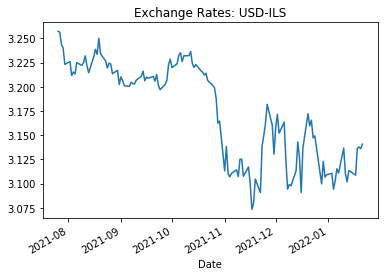

In [17]:
(
    usd_to_ils_rates
    ['Rate']
    .plot(title='Exchange Rates: USD-ILS')
);

### Scatter Plot 

Now let's try something else, to demonstrate the differences between the days.

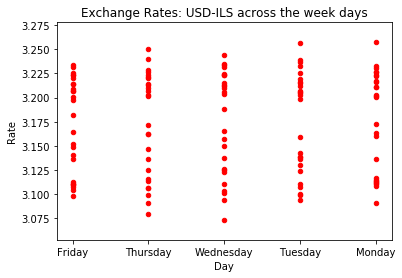

In [18]:
(
    usd_to_ils_rates
    .plot
    .scatter(
        x='Day',
        y='Rate',
        c='Red',
        title='Exchange Rates: USD-ILS across the week days'
    )
);

Something here looks odd. it appears there are less trading 'Sundays', which could be the reason for our former result.<br>
Let's check it.

In [19]:
(
    usd_to_ils_rates
    .groupby('Day')
    ['Rate']
    .count()
)

Day
Friday       26
Monday       26
Thursday     26
Tuesday      26
Wednesday    26
Name: Rate, dtype: int64

Yep, totally true. therefore, let's check for the all the other days excluding Sunday.<br>
Filtering the Dataframe to exclude Sundays.

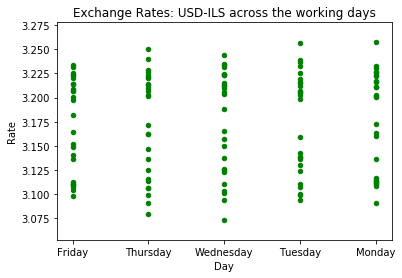

In [20]:
(
    usd_to_ils_rates
    .query('Day != "Sunday"')
    .plot
    .scatter(
        x='Day',
        y='Rate',
        c='Green',
        title='Exchange Rates: USD-ILS across the working days'
    )
);

And based on the most lower points, we can now see that the lowest days occurs in the mid-of-the-week days.<br>

## Analyze Across Weeks using Groupby

Another cool way to possible be able to better identifiy the aforementioned trend, check the max & min weekly rate, and on which day did it happen.

First, let's set up our data in a way that will allow us to analyze it.

And by a grouped table, which will show the day of each week which the highest, and later the lowest rate occured on.

In [21]:
(
     usd_to_ils_rates
     .assign(Week = usd_to_ils_rates.index.week)
     .groupby(['Week'])
     ['Day', 'Rate']
     .max()
     .style
     .background_gradient(cmap='summer', subset=['Rate'])
)

,Day,Rate
Week,,
1,Wednesday,3.115250
2,Wednesday,3.136660
3,Wednesday,3.140750
30,Wednesday,3.257220
31,Wednesday,3.226110
32,Wednesday,3.231880
33,Wednesday,3.250010
34,Wednesday,3.226620
35,Wednesday,3.216950


In [22]:
(
     usd_to_ils_rates
     .assign(Week = usd_to_ils_rates.index.week)
     .groupby(['Week'])
     ['Day', 'Rate']
     .min()
     .style
     .background_gradient(cmap='summer', subset=['Rate'])
)

,Day,Rate
Week,,
1,Friday,3.094070
2,Friday,3.101660
3,Friday,3.108650
30,Friday,3.223030
31,Friday,3.211620
32,Friday,3.214420
33,Friday,3.230950
34,Friday,3.213500
35,Friday,3.201020


### Analysis conclusion

And here is the answer for our question - which days are the best day to conduct a currency conversion between USD and ILS to maximize your profits: Wednsday for USD to ILS and Friday to ILS to USD